# Data Analysis - Automotive Industry
*Author: Pramika Garg*

*Mentor: Deepak Garg*

## Imports & Data Cleaning

In [1]:
!pip install pycaret==2.3.10 markupsafe==2.0.1 pyyaml==5.4.1
!pip install altair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.1 MB/s 
     |████████████████████████████████| 636 kB 49.8 MB/s 
     |████████████████████████████████| 2.0 MB 36.0 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 1.3 MB 47.5 MB/s 
     |████████████████████████████████| 120 kB 57.8 MB/s 
     |████████████████████████████████| 17.8 MB 528 kB/s 
     |████████████████████████████████| 167 kB 68.5 MB/s 
     |████████████████████████████████| 262 kB 46.3 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 6.8 MB 52.2 MB/s 
     |████████████████████████████████| 1.7 MB 5.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Imports for Linear Algebra, Data Processing, CSV File I/O, Data Wrangling & Data Visualisation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import jinja2
from pycaret.clustering import *

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [4]:
# Importing the Dataset

df = pd.read_csv('cars_engage_2022.csv')

In [5]:
# Redefine & Rename Index

df.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
df.set_index('Index')

,Make,Model,Variant,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Drivetrain,Cylinder_Configuration,Emission_Norm,Engine_Location,Fuel_System,Fuel_Tank_Capacity,Fuel_Type,Height,Length,Width,Body_Type,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Gears,Ground_Clearance,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Front_Track,Rear_Track,Front_Tyre_&_Rim,Rear_Tyre_&_Rim,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Odometer,Speedometer,Tachometer,Tripmeter,Seating_Capacity,Seats_Material,Type,Wheelbase,Wheels_Size,Start_/_Stop_Button,12v_Power_Outlet,Audiosystem,Aux-in_Compatibility,Average_Fuel_Consumption,Basic_Warranty,Bluetooth,Boot-lid_Opener,Boot_Space,CD_/_MP3_/_DVD_Player,Central_Locking,Child_Safety_Locks,Clock,Cup_Holders,Distance_to_Empty,Door_Pockets,Engine_Malfunction_Light,Extended_Warranty,FM_Radio,Fuel-lid_Opener,Fuel_Gauge,Handbrake,Instrument_Console,Low_Fuel_Warning,Minimum_Turning_Radius,Multifunction_Display,Sun_Visor,Third_Row_AC_Vents,Ventilation_System,Auto-Dimming_Rear-View_Mirror,Hill_Assist,Gear_Indicator,3_Point_Seat-Belt_in_Middle_Rear_Seat,Ambient_Lightning,Cargo/Boot_Lights,Drive_Modes,Engine_Immobilizer,High_Speed_Alert_System,Lane_Watch_Camera/_Side_Mirror_Camera,Passenger_Side_Seat-Belt_Reminder,Seat_Back_Pockets,Voice_Recognition,Walk_Away_Auto_Car_Lock,ABS_(Anti-lock_Braking_System),Headlight_Reminder,Adjustable_Headrests,Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,EBD_(Electronic_Brake-force_Distribution),Fasten_Seat_Belt_Warning,Gear_Shift_Reminder,Number_of_Airbags,Compression_Ratio,Adjustable_Steering_Column,Other_Specs,Other_specs,Parking_Assistance,Key_Off_Reminder,USB_Compatibility,Android_Auto,Apple_CarPlay,Cigarette_Lighter,Infotainment_Screen,Multifunction_Steering_Wheel,Average_Speed,EBA_(Electronic_Brake_Assist),Seat_Height_Adjustment,Navigation_System,Second_Row_AC_Vents,Tyre_Pressure_Monitoring_System,Rear_Center_Armrest,iPod_Compatibility,ESP_(Electronic_Stability_Program),Cooled_Glove_Box,Recommended_Tyre_Pressure,Heated_Seats,Turbocharger,ISOFIX_(Child-Seat_Mount),Rain_Sensing_Wipers,Paddle_Shifters,Leather_Wrapped_Steering,Automatic_Headlamps,Engine_Type,ASR_/_Traction_Control,Cruise_Control,USB_Ports,Heads-Up_Display,Welcome_Lights,Battery,Electric_Range
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Tata,Nano Genx,Xt,"Rs. 2,92,667",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,660 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,Electric Power,Only Front Windows,NaN,Remote,38PS@5500rpm,51Nm@4000rpm,Digital,Analog,Not on offer,Yes,4.0,Fabric,Manual,2230 mm,4 B X 12,Yes,Yes,CD Player with USB & Aux-in,Yes,Yes,2 years /75000 Kms (years/distance whichever c...,Yes,Internal,110 litres,Yes,Yes,Yes,Digital,Front,Yes,Front,Yes,2 years /150000 Kms (years/distance whichever ...,Yes,Internal,Digital,Manual,Analog + Digital,Yes,4 meter,Yes,Driver & Front Passenger,Not Applicable,Manual Air conditioning with cooling and heating,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Tata,Nano Genx,Xe,"Rs. 2,36,447",624 cc,2.0,2.0,RWD (Rear Wheel Drive),In-line,BS IV,"Rear, Transverse",Injection,24 litres,Petrol,1652 mm,3164 mm,1750 mm,Hatchback,5.0,?23.6 km/litre,NaN,23.6 km/litre,NaN,725 kg,4,180 mm,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",1325 mm,1315 mm,135/70R12,155/65R12,NaN,NaN,

In [6]:
# Cleaning Up Different Columns & Converting to Floats

df['Ex-Showroom_Price'] = df['Ex-Showroom_Price'].str.replace('Rs. ', '').str.replace(',', '').astype(float)
df['Displacement'] = df['Displacement'].str.replace(' cc', '').astype(float)
df['Fuel_Tank_Capacity'] = df['Fuel_Tank_Capacity'].str.replace(' litres', '').astype(float)
df['Height'] = df['Height'].str.replace(' mm', '').astype(float)
df['Length'] = df['Length'].str.replace(' mm', '').astype(float)
df['Width'] = df['Width'].str.replace(' mm', '').astype(float)
df['City_Mileage'] = df['City_Mileage'].str.replace('?', '').str.replace(' km/litre', '').str.replace(',', '.').str.replace('-', '').astype(float)
df['Highway_Mileage'] = df['Highway_Mileage'].str.replace(' km/litre', '').astype(float)
df['ARAI_Certified_Mileage'] = df['ARAI_Certified_Mileage'].str.replace(' km/litre', '').astype(float)
df['ARAI_Certified_Mileage_for_CNG'] = df['ARAI_Certified_Mileage_for_CNG'].str.replace(' km/kg', '').astype(float)
df['Kerb_Weight'] = df['Kerb_Weight'].str.replace(' kg', '').astype(float)
df['Ground_Clearance'] = df['Ground_Clearance'].str.replace(' mm', '').astype(float)
df['Front_Track'] = df['Front_Track'].str.replace('(R13)', '').str.replace(' mm', '').str.replace(',', '').astype(float)
df['Rear_Track'] = df['Rear_Track'].str.replace(' mm', '').str.replace(',', '').astype(float)
df['Wheelbase'] = df['Wheelbase'].str.replace(' mm', '').astype(float)
df['Boot_Space'] = df['Boot_Space'].str.replace(' litres', '').astype(float)
df['Minimum_Turning_Radius'] = df['Minimum_Turning_Radius'].str.replace(' meter', '').astype(float)
df['Gross_Vehicle_Weight'] = df['Gross_Vehicle_Weight'].str.replace(' kg', '').astype(float)

In [7]:
# Replace Missing Values in All Columns

def replace_with_nan(missing_val, current_val):
    if current_val == missing_val:
        return np.nan
    else:
        return current_val

for column in df.columns:
    if df[column].dtype == np.object:
        df[column] = df[column].apply(lambda x: replace_with_nan('', x))


In [8]:
# Encoding Categorical Columns

df = pd.get_dummies(df)

## Exploratory Data Analysis

In [ ]:
# Basic Exploratory Data Analysis

list_categorical_cols = list(df.columns[df.dtypes == np.object])
list_numerical_cols = list(df.columns[df.dtypes != np.object])

for numerical_feat in list_numerical_cols:
    plt.figure(figsize=(8.0, 6.0))
    plt.hist(df[numerical_feat])
    plt.title(f"Hist of {numerical_feat}")
    plt.show()

for cat_feature in list_categorical_cols:
    print(df[cat_feature].value_counts())

In [ ]:
# Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

        
def time_series_plot(df):
    """Given dataframe, generate times series plot of numeric data by daily, monthly and yearly frequency"""
    print("\nTo check time series of numeric data  by daily, monthly and yearly frequency")
    if len(df.select_dtypes(include='datetime64').columns)>0:
        for col in df.select_dtypes(include='datetime64').columns:
            for p in ['D', 'M', 'Y']:
                if p=='D':
                    print("Plotting daily data")
                elif p=='M':
                    print("Plotting monthly data")
                else:
                    print("Plotting yearly data")
                for col_num in df.select_dtypes(include=np.number).columns:
                    __ = df.copy()
                    __ = __.set_index(col)
                    __T = __.resample(p).sum()
                    ax = __T[[col_num]].plot()
                    ax.set_ylim(bottom=0)
                    ax.get_yaxis().set_major_formatter(
                    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
                    plt.show()

                    
def numeric_eda(df, hue=None):
    """Given dataframe, generate EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    display(df.describe().T)
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()
    
    if len(df.select_dtypes(include='category').columns) > 0:
        for col_num in df.select_dtypes(include=np.number).columns:
            for col in df.select_dtypes(include='category').columns:
                fig = sns.catplot(x=col, y=col_num, kind='violin', data=df, height=5, aspect=2)
                fig.set_xticklabels(rotation=90)
                plt.show()
    
    # Plot the pairwise joint distributions
    print("\nTo check pairwise joint distribution of numeric data")
    if hue==None:
        sns.pairplot(df.select_dtypes(include=np.number))
    else:
        sns.pairplot(df.select_dtypes(include=np.number).join(df[[hue]]), hue=hue)
    plt.show()


def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")
    
    
def categorical_eda(df, hue=None):
    """Given dataframe, generate EDA of categorical data"""
    print("\nTo check: \nUnique count of non-numeric data\n")
    print(df.select_dtypes(include=['object', 'category']).nunique())
    top5(df)
    # Plot count distribution of categorical data
    for col in df.select_dtypes(include='category').columns:
        fig = sns.catplot(x=col, kind="count", data=df, hue=hue)
        fig.set_xticklabels(rotation=90)
        plt.show()
    

def eda(df):
    """Given dataframe, generate exploratory data analysis"""
    # check that input is pandas dataframe
    if type(df) != pd.core.frame.DataFrame:
        raise TypeError("Only pandas dataframe is allowed as input")
        
    # replace field that's entirely space (or empty) with NaN
    df = df.replace(r'^\s*$', np.nan, regex=True)

    print("Preview of data:")
    display(df.head(3))

    print("\nTo check: \n (1) Total number of entries \n (2) Column types \n (3) Any null values\n")
    print(df.info())

    # generate preview of entries with null values
    if df.isnull().any(axis=None):
        print("\nPreview of data with null values:")
        display(df[df.isnull().any(axis=1)].head(3))
        missingno.matrix(df)
        plt.show()

    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("\n***Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("\nNo duplicated entries found")

    # EDA of categorical data
    categorical_eda(df)
    
    # EDA of numeric data
    numeric_eda(df)
        
    # Plot time series plot of numeric data
    time_series_plot(df)

In [ ]:
eda(df)

## Manual Spectral Clustering

In [9]:
from sklearn.cluster import SpectralClustering

spectral_cluster_model= SpectralClustering(
    n_clusters=6, 
    random_state=29062001, 
    n_neighbors=8, 
    affinity='nearest_neighbors'
)

In [10]:
df.fillna(999, inplace=True)
df['target'] = spectral_cluster_model.fit_predict(df)
df['target'] = df['target'].astype('category')

In [11]:
df.sample(5)

,Index,Ex-Showroom_Price,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Length,Width,Doors,City_Mileage,Highway_Mileage,ARAI_Certified_Mileage,ARAI_Certified_Mileage_for_CNG,Kerb_Weight,Ground_Clearance,Front_Track,Rear_Track,Seating_Capacity,Wheelbase,Boot_Space,Minimum_Turning_Radius,Gross_Vehicle_Weight,Number_of_Airbags,USB_Ports,Make_Aston Martin,Make_Audi,Make_Bajaj,Make_Bentley,Make_Bmw,Make_Bugatti,Make_Datsun,Make_Dc,Make_Ferrari,Make_Fiat,Make_Force,Make_Ford,Make_Honda,Make_Hyundai,Make_Icml,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Lamborghini,Make_Land Rover,Make_Land Rover Rover,Make_Lexus,Make_Mahindra,Make_Maruti Suzuki,Make_Maruti Suzuki R,Make_Maserati,Make_Mg,Make_Mini,Make_Mitsubishi,Make_Nissan,Make_Porsche,Make_Premier,Make_Renault,Make_Skoda,Make_Tata,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_3-Series,Model_458 Speciale,Model_458 Spider,Model_488 Gtb,Model_5-Series,Model_6-Series,Model_7-Series,Model_718,Model_812 Superfast,Model_911,Model_A3,Model_A3 Cabriolet,Model_A4,Model_A5,Model_A5 Cabriolet,Model_A6,Model_A8 L,Model_Abarth Avventura,Model_Abarth Punto,Model_Accord Hybrid,Model_Alto,Model_Alto 800 Tour,Model_Alto K10,Model_Altroz,Model_Alturas G4,Model_Amaze,Model_Ameo,Model_Aspire,Model_Aura,Model_Avanti,Model_Aventador,Model_Avventura,Model_Baleno,Model_Baleno Rs,Model_Bentayga,Model_Bolero,Model_Bolero Power Plus,Model_Bolt,Model_Brv,Model_Camry,Model_Captur,Model_Carnival,Model_Cayenne,Model_Cayenne Coupe,Model_Celerio,Model_Celerio Tour,Model_Celerio X,Model_Chiron,Model_Ciaz,Model_City,Model_Civic,Model_Clubman,Model_Compass,Model_Compass Trailhawk,Model_Continental Gt,Model_Convertible,Model_Cooper 3 Door,Model_Cooper 5 Door,Model_Corolla Altis,Model_Countryman,Model_Cr-V,Model_Creta,Model_Db 11,Model_Discovery,Model_Discovery Sport,Model_Dmax V-Cross,Model_Duster,Model_Dzire,Model_Dzire Tour,Model_E Verito,Model_E2O Plus,Model_Ecosport,Model_Eeco,Model_Elantra,Model_Elite I20,Model_Endeavour,Model_Ertiga,Model_Es,Model_Etios Cross,Model_Etios Liva,Model_Extreme,Model_F-Pace,Model_F-Type,Model_Figo,Model_Flying Spur,Model_Fortuner,Model_Freestyle,Model_Ghibli,Model_Glanza,Model_Go,Model_Go+,Model_Grancabrio,Model_Grand Cherokee,Model_Grand I10,Model_Grand I10 Nios,Model_Grand I10 Prime,Model_Granturismo,Model_Gtc4 Lusso,Model_Gtr,Model_Gurkha,Model_Gypsy,Model_Harrier,Model_Hector,Model_Hexa,Model_Huracan,Model_I20 Active,Model_Ignis,Model_Innova Crysta,Model_Jazz,Model_John Cooper Works,Model_Kicks,Model_Kodiaq,Model_Kodiaq Scout,Model_Kona Electric,Model_Kuv100 Nxt,Model_Kwid,Model_Land Cruiser,Model_Land Cruiser Prado,Model_Lc 500H,Model_Levante,Model_Linea,Model_Linea Classic,Model_Lodgy,Model_Ls 500H,Model_Lx 450D,Model_Lx 570,Model_M2 Competition,Model_M4,Model_M5,Model_Macan,Model_Marazzo,Model_Mercedes-Benz A-Class,Model_Mercedes-Benz Amg Gt 4-Door Coupe,Model_Mercedes-Benz Amg-Gt,Model_Mercedes-Benz B-Class,Model_Mercedes-Benz C-Class,Model_Mercedes-Benz C-Class Cabriolet,Model_Mercedes-Benz Cla-Class,Model_Mercedes-Benz Cls,Model_Mercedes-Benz E-Class,Model_Mercedes-Benz E-Class All Terrain,Model_Mercedes-Benz E-Class Cabriolet,Model_Mercedes-Benz G-Class,Model_Mercedes-Benz Gla-Class,Model_Mercedes-Benz Glc,Model_Mercedes-Benz Gle,Model_Mercedes-Benz Gls,Model_Mercedes-Benz Maybach,Model_Mercedes-Benz S-Class,Model_Mercedes-Benz S-Class Cabriolet,Model_Mercedes-Benz V-Class,Model_Micra,Model_Micra Active,Model_Monte Carlo,Model_Montero,Model_Mu-X,Model_Mulsanne,Model_Mustang,Model_Nano Genx,Model_Nexon,Model_Nexon Ev,Model_Nuvosport,Model_Nx 300H,Model_Octavia,Model_Omni,Model_Outlander,Model_Pajero Sport,Model_Panamera,Model_Passat,Model_Platinum Etios,Model_Polo,Model_Portofino,Model_Prius,Model_Punto Evo,Model_Punto Evo Pure,Model_Q3,Model_Q5,Model_Q7,Model_Q8,Model_Quattroporte,Model_Qute (Re60),Model_R8,Model_Range,Model_Range Evoque,Model_Range Evoque Convertible,Model_Range Sport,...,"Airbags_Driver frontal airbag, Front passenger frontal airba

## Automated Machine Learning

In [12]:
s = setup(df, normalize=True)

,Description,Value
0,session_id,4226
1,Original Data,"(1276, 3777)"
2,Missing Values,False
3,Numeric Features,3776
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(1276, 3781)"
9,CPU Jobs,-1


In [13]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


### K-Means Clustering

In [14]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0672,92.6942,3.0034,0,0,0


In [15]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### Affinity Propagation

In [16]:
ap = create_model('ap')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2946,19.4256,1.2226,0,0,0


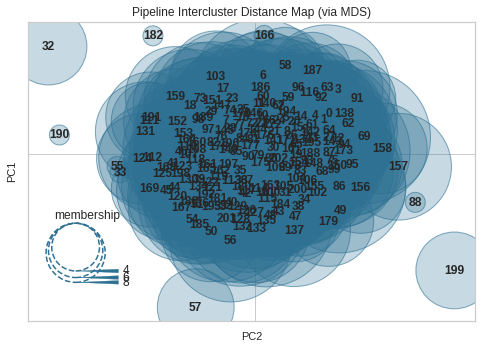

In [19]:
evaluate_model(ap)

### Mean Shift Clustering

In [20]:
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1716,10.1296,0.8224,0,0,0


In [22]:
evaluate_model(meanshift)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

### Spectral Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4258,6.7972,0.7517,0,0,0


In [ ]:
evaluate_model(sc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

### Agglomerative Clustering

In [23]:
hclust = create_model('hclust')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.129,84.7753,2.3407,0,0,0


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

<Figure size 576x396 with 0 Axes>

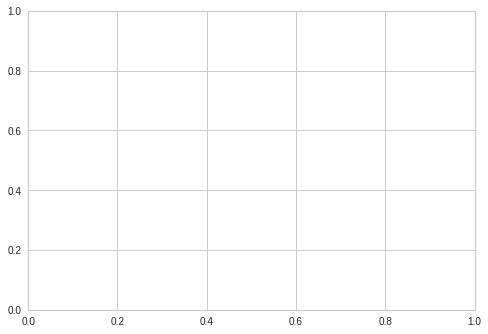

<Figure size 576x396 with 0 Axes>

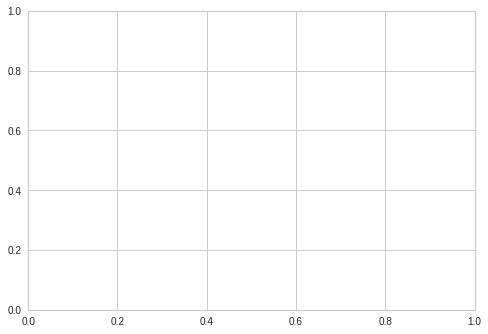

In [24]:
evaluate_model(hclust)

### Density-Based Spatial Clustering

In [25]:
dbscan = create_model('dbscan')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0,0,0,0,0,0


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Cluster PCA Plot (2d)', …

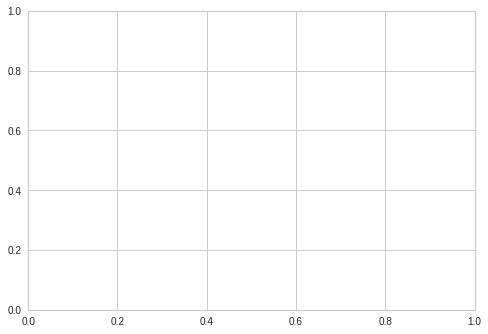

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [27]:
evaluate_model(dbscan)

### OPTICS Clustering

In [ ]:
optics = create_model('optics')

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:10:51
Status,. . . . . . . . . . . . . . . . . .,Fitting 4 Clusters
Estimator,. . . . . . . . . . . . . . . . . .,OPTICS Clustering


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness


In [ ]:
evaluate_model(optics)

### Birch Clustering

In [ ]:
birch = create_model('birch')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1294,84.8952,2.3401,0,0,0


In [ ]:
evaluate_model(birch)

NameError: ignored

### K-Modes Clustering

In [ ]:
kmodes = create_model('kmodes')

NameError: ignored

In [ ]:
evaluate_model(kmodes)